In [1]:
import tweepy, pandas as pd, matplotlib.pyplot as plt, nltk, re, numpy as np, seaborn as sb
from datetime import datetime
from textblob import TextBlob
from wordcloud import WordCloud 
pd.options.display.max_colwidth = 300
plt.rcParams['figure.figsize'] = (14, 7)
# polaridad >0.2 positivo, [-0.2:0.2] es neutro, <-0.2 negativo

In [2]:
datos = pd.read_csv("datatweets.csv",encoding='utf-8-sig', names=['fecha', 'tweet', 'polaridad','User','local'],
                    parse_dates=['fecha'])
print('El tamaño inicial del dataframe',datos.shape)

El tamaño inicial del dataframe (16300, 5)


In [3]:
dmap = datos.groupby('local')['fecha'].nunique().sort_values(ascending=False)
dmap.head(30)

local
None                       3965
United States               166
London                      150
India                       149
London, England             140
UK                          129
United Kingdom              117
New York, NY                110
Washington, DC               75
USA                          72
Philippines                  69
England, United Kingdom      69
Canada                       64
Singapore                    62
Los Angeles, CA              60
Lagos, Nigeria               60
Nigeria                      53
London, UK                   51
California, USA              48
Ireland                      47
Toronto, Ontario             42
England                      41
Chicago, IL                  39
Earth                        38
New York                     35
Boston, MA                   34
Washington DC                33
New Delhi, India             33
Global                       32
Jonava                       32
Name: fecha, dtype: int64

In [4]:
!pip install geos
!sudo apt-get install libgeos-3.X.X
!sudo apt-get install libgeos-dev
!pip install --user https://github.com/matplotlib/basemap/archive/master.zip

     |████████████████████████████████| 409kB 6.8MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.X.X
E: Couldn't find any package by glob 'libgeos-3.X.X'
E: Couldn't find any package by regex 'libgeos-3.X.X'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
     |████████████████████████████████| 133.1MB 81kB/s 
     |████████████████████████████████| 6.5MB 5.8MB/s 
     |████████████████████████████████| 225kB 24.8MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759558 sha256=8516c54e5da30daa16b57829aaf001f2feca6802fcdd3b8e0234c1a92507b919
  Stored in directory: /tmp/pip-ephem-wheel-cache-6z_nflcm/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1

In [6]:
from mpl_toolkits.basemap import Basemap
plt.rcParams['figure.figsize'] = (18, 9)
m = Basemap(projection='mill')
m.drawcoastlines(color="green")
lista = [[m(-104.1, 39.6), 'USA'], [m(0.8, 54.9), 'UK'], [m(-112.1, 60.2), 'CANADA'], [m(78.4, 23.2), 'INDIA']
         , [m(122.8, 12.3), 'FILIPINAS'], [m(103.8, 1.3), 'SINGAPUR'], [m(7.8, 9.4), 'NIGERIA']]
for xy,z in lista:
  x, y = xy
  plt.plot(x, y, 'ok', markersize=4, color="green")
  plt.text(x, y, z, fontsize=15, color="red");
plt.title('Mapa de ubicaciones')
plt.tight_layout(pad=0)

ModuleNotFoundError: ignored

In [7]:
duser = datos.groupby('User')['fecha'].nunique().sort_values(ascending=False)
duser.head(30)

User
FabioIng           85
pzsiegel           37
Reuters_Health     36
Inaliberata1       32
Susie1773          31
cov19treatments    28
globalfirstnews    23
JamieJones77       19
JonThm             17
Michael72881081    16
ABSCBNNews         16
AlArabiya_Eng      14
JustCanadianGal    13
BarryCPearson      13
IndiaToday         13
TheLockGuy         13
shehzadyounis      13
iWeller_health     13
MKucala            12
NewMailNG          12
ChannelNewsAsia    12
MickeyPearce17     11
htTweets           11
Xoofner            11
DeccanHerald       11
KSingh_1469        10
PhilstarNews       10
kizu91             10
informacija        10
Reuters            10
Name: fecha, dtype: int64

El intervalo de fechas es: 2020-12-28T18:05:55.000000000 2021-01-07T00:59:52.000000000


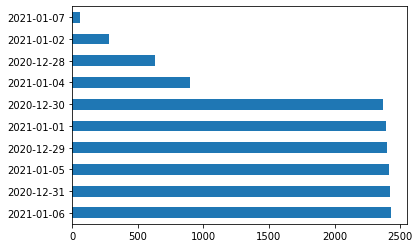

In [8]:
datos["dia"] = datos["fecha"].dt.date
datos["dia"].sort_index(ascending = True , inplace = True)
print('El intervalo de fechas es:', datos[['fecha']].min().values[0], datos[['fecha']].max().values[0])
datos["dia"].value_counts().plot.barh()

In [9]:
word_counts = datos['tweet'].apply(lambda x: len(x.split()))
word_counts.describe()

count    16300.000000
mean        17.259264
std          4.103292
min          1.000000
25%         15.000000
50%         18.000000
75%         20.000000
max         29.000000
Name: tweet, dtype: float64

Text(0, 0.5, 'Polaridad Textblob Sentimiento')

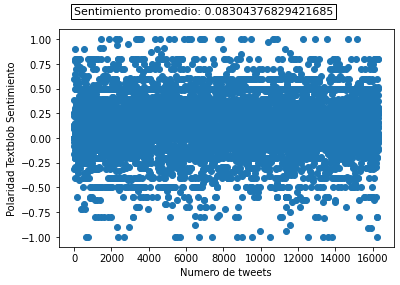

In [10]:
polaridadPromedio = datos.polaridad.mean()
plt.scatter([x for x in range(datos.shape[0])] , datos.polaridad)
plt.xlabel('Numero de tweets')
plt.text(0, 1.25, "Sentimiento promedio: " + str(polaridadPromedio),
         fontsize=11,bbox=dict(facecolor="none",edgecolor="black",boxstyle="square, pad=0.25"))
plt.ylabel('Polaridad Textblob Sentimiento')

In [11]:
plt.hist(word_counts.values, bins=25)
plt.title('Histograma de palabras')
plt.grid(True)

In [12]:
nltk.download('punkt') # At first you have to download these nltk packages.
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [13]:
stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
lemmatizer = WordNetLemmatizer()

In [14]:
def data_preprocessing(review):
  review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
  review =  re.sub(r"&amp;|â€¦", ' ', review)
  review =  re.sub(r"http\S+", ' ', review)
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  review = review.lower()
  tokens = nltk.word_tokenize(review)
  review = [word for word in tokens if word not in stop_words]
  # lemmatization
  # review = [lemmatizer.lemmatize(word) for word in review]
  review = ' '.join(review)
  return review

In [15]:
datos['preprocessed_tweet'] = datos['tweet'].apply(lambda tweet: data_preprocessing(tweet))
print('Creando una columna con los tweets', datos.shape)

Creando una columna con los tweets (16300, 7)


In [16]:
datos['sentiment'] = datos['preprocessed_tweet'].apply(lambda tweet: TextBlob(tweet).sentiment[0])
print('Calculando el analisis de sentimiento con la nueva columna de tweets')
datos.tail(2)

Calculando el analisis de sentimiento con la nueva columna de tweets


fecha  ... sentiment
16298 2021-01-06 23:15:46  ... -0.016667
16299 2021-01-06 23:15:09  ...  0.800000

[2 rows x 8 columns]

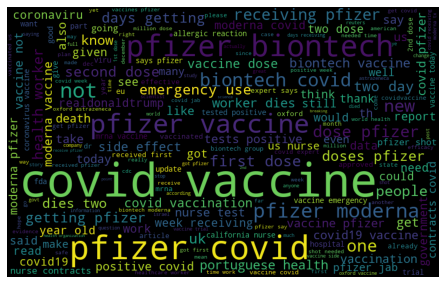

In [17]:
words_list = datos['preprocessed_tweet'].unique().tolist()
pos_words = " ".join(words_list)
pos_wordcloud =  WordCloud(width=800, height = 500, stopwords=stop_words).generate(pos_words)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Raices


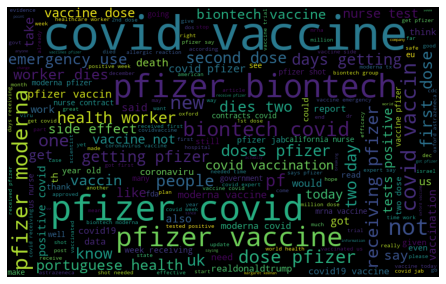

In [18]:
from nltk.stem import PorterStemmer
print("Raices")
stemmer = PorterStemmer()
mystemmers = [stemmer.stem(word) for word in words_list]
pos_words = " ".join(mystemmers)
pos_wordcloud =  WordCloud(width=800, height = 500, stopwords=stop_words).generate(pos_words)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [19]:
from nltk.stem import WordNetLemmatizer
print("Lematizacion")
lematizer = WordNetLemmatizer()
mylem = [lematizer.lemmatize(word) for word in words_list]
pos_words = " ".join(mylem)
pos_wordcloud =  WordCloud(width=800, height = 500, stopwords=stop_words).generate(pos_words)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Lematizacion


**Ejemplo valor positivo**

In [20]:
datos.loc[datos['sentiment'] == datos['sentiment'].min()].sample(n=3, random_state=1)

fecha  ... sentiment
13989 2021-01-06 01:03:36  ...      -1.0
13356 2021-01-05 19:41:43  ...      -1.0
2693  2020-12-29 20:04:35  ...      -1.0

[3 rows x 8 columns]

In [21]:
datos.loc[datos['sentiment'] == datos['sentiment'].max()].sample(n=3, random_state=1)

fecha  ... sentiment
6104 2020-12-31 07:56:42  ...       1.0
6082 2020-12-31 05:49:56  ...       1.0
6806 2020-12-31 14:58:34  ...       1.0

[3 rows x 8 columns]

In [24]:
def clasificar(valor):
  if valor < -0.2:
    return -1
  else:
    if valor >=-0.2 and valor <=0.2:
      return 0
    else:
      if valor > 0.2:
        return 1

In [25]:
from sklearn.model_selection import train_test_split
datos['sentiment'] = datos['sentiment'].astype(float)
datos['polaridad_new'] = datos['sentiment'].apply(lambda valor: clasificar(valor))
df = datos[['preprocessed_tweet','polaridad_new']]
X = df['preprocessed_tweet'].values
y = df['polaridad_new'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11410,) (4890,) (11410,) (4890,)


In [26]:
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts))
frequencies

array([[  -1,    0,    1],
       [ 238, 3709,  943]])

In [27]:
datos.loc[datos['polaridad_new'] == datos['polaridad_new'].max()].sample(n=3, random_state=1)

fecha  ... polaridad_new
3212  2020-12-30 02:52:35  ...             1
12620 2021-01-05 12:47:18  ...             1
11324 2021-01-04 23:46:35  ...             1

[3 rows x 9 columns]

In [ ]:
datos[['fecha', 'polaridad_new']].groupby(by=['polaridad_new']).count()

**BOW: Vectorizando**

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=9)
X_train_bow = vect.fit_transform(X_train)
X_test_bow = vect.transform(X_test)
print('X_train_bow shape: ', X_train_bow.shape)
print('X_test_bow shape: ', X_test_bow.shape)

X_train_bow shape:  (11410, 1660)
X_test_bow shape:  (4890, 1660)


In [29]:
"""
from sklearn.feature_extraction.text import TfidfVectorizer
#vect = CountVectorizer(max_features=10000)
vectTFIDF = TfidfVectorizer(min_df=15)
X_train_tfidf = vect.fit_transform(X_train)
X_test_tfidf = vect.transform(X_test)
print('X_train_tfidf shape: ', X_train_tfidf.shape)
print('X_test_tfidf shape: ', X_test_tfidf.shape)
"""

"\nfrom sklearn.feature_extraction.text import TfidfVectorizer\n#vect = CountVectorizer(max_features=10000)\nvectTFIDF = TfidfVectorizer(min_df=15)\nX_train_tfidf = vect.fit_transform(X_train)\nX_test_tfidf = vect.transform(X_test)\nprint('X_train_tfidf shape: ', X_train_tfidf.shape)\nprint('X_test_tfidf shape: ', X_test_tfidf.shape)\n"

**Estandarizacion o normalización**

In [30]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = StandardScaler(with_mean=False)
#scaler = Normalizer(norm='l2', copy=True)
X_train_scaled = scaler.fit_transform(X_train_bow)
X_test_scaled = scaler.transform(X_test_bow)

**Modelo KNN**

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score,auc

In [32]:
neighbors = np.arange(1, 9)
train_exactitud = np.empty(len(neighbors))
test_exactitud = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1, p=2)
  knn.fit(X_train_scaled, y_train)
  train_exactitud[i] = knn.score(X_train_scaled, y_train)
  test_exactitud[i] = knn.score(X_test_scaled, y_test)
plt.title('Knn variation')
plt.plot(neighbors, test_exactitud, label='Test', linewidth=3, color="blue")
plt.plot(neighbors, train_exactitud, label='train', linewidth=3, color="red")
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [34]:
hiper1 = {'leaf_size': np.arange(20,25), 'p': np.arange(1,3)}
grid = GridSearchCV(KNeighborsClassifier(n_neighbors=3, algorithm='brute', n_jobs=-1), hiper1, cv=10)
grid.fit(X_train_scaled, y_train)
grid.best_params_

{'leaf_size': 20, 'p': 1}

In [35]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='brute', leaf_size=20, p=1, n_jobs=-1)
knn.fit(X_train_scaled, y_train)
print('Con KNN SCORE test', knn.score(X_test_scaled, y_test))
print('Con KNN SCORE train', knn.score(X_train_scaled, y_train))

Con KNN SCORE test 0.8415132924335378
Con KNN SCORE train 0.9047326906222611


In [36]:
y_predknn = knn.predict(X_test_scaled)
cmknn = confusion_matrix(y_test, y_predknn)
sb.set(font_scale=2.0)
sb.heatmap(cmknn, annot=True, fmt='d', xticklabels=[-1,0,1] , yticklabels=[-1,0,1])
plt.title('Matriz de confusión knn')

NameError: ignored

**Modelo SVC**

In [ ]:
hiper1 = {'C': np.array([0.1,1,2]), 'gamma': np.array([0.0009,0.0008])}
grid = GridSearchCV(SVC(kernel='rbf'), hiper1, cv=5)
grid.fit(X_train_scaled, y_train)
grid.best_params_

In [ ]:
modelsvc = SVC(kernel='rbf', C=1, gamma=0.0009)
modelsvc.fit(X_train_scaled, y_train)
print ('Score test', modelsvc.score(X_test_scaled, y_test))
print ('Score train', modelsvc.score(X_train_scaled, y_train))

In [ ]:
y_predsvc = modelsvc.predict(X_test_scaled)
cmsvc = confusion_matrix(y_test, y_predsvc)
sb.heatmap(cmsvc, annot=True, fmt='d', xticklabels=[-1,0,1] , yticklabels=[-1,0,1])
plt.title('Matriz de confusión')

**Modelo Decission Tree**

In [ ]:
model_tree = DecisionTreeClassifier(random_state=0)
grid_tree = {'max_depth': np.arange(14,20,2),'min_samples_leaf': np.arange(1,11,5),
        'min_samples_split': np.arange(22,32,5),'max_features': np.arange(9,13,2)}
print('Los valores a probar:', grid_tree)
model_tree_grid = GridSearchCV(estimator = model_tree,param_grid = grid_tree,cv = 5,verbose=2,n_jobs = -1)
model_tree_grid.fit(X_train_scaled, y_train)

In [ ]:
model_dt_grid_best = model_tree_grid.best_estimator_
print('Los hiperparámetros del mejor modelo son:')
print(model_tree_grid.best_params_)
print()
# mejor parametros
print('Accuracy en grilla en entrenamiento:', model_dt_grid_best.score(X_train_scaled, y_train))
print('Accuracy en grilla en validación:', model_dt_grid_best.score(X_test_scaled, y_test))

In [ ]:
y_pred_dtree = model_dt_grid_best.predict(X_test_scaled)
cmdt = confusion_matrix(y_test, y_pred_dtree)
sb.heatmap(cmdt, annot=True, fmt='d', xticklabels=[-1,0,1] , yticklabels=[-1,0,1])
plt.title('Matriz de confusión')

**Modelo Random Forest**

In [ ]:
grid_forest = { 'n_estimators': [4,5,6,7,8],'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}
model_forest = RandomForestClassifier(random_state=0)
model_dt_grid_forest = GridSearchCV(estimator=model_forest,param_grid=grid_forest,cv= 5,
    verbose=2,n_jobs = -1)
model_dt_grid_forest.fit(X_train_scaled, y_train)

In [ ]:
model_grid_forest_best = model_dt_grid_forest.best_estimator_
print('Mejor modelo: ')
print(model_grid_forest_best)
print()
print('Los hiperparámetros del mejor modelo son:')
print(model_grid_forest_best.estimator_params)
print()
print('Accuracy luego de búsqueda en grilla en entrenamiento:', model_grid_forest_best.score(X_train_scaled, y_train))
print('Accuracy luego de búsqueda en grilla en validación:', model_grid_forest_best.score(X_test_scaled, y_test))

In [ ]:
y_pred_rtree = model_grid_forest_best.predict(X_test_scaled)
cmrt = confusion_matrix(y_test, y_pred_rtree)
sb.heatmap(cmrt, annot=True, fmt='d',xticklabels=[-1,0,1] , yticklabels=[-1,0,1])
plt.title('Matriz de confusión')